### Import the libraries and data sets

In [40]:
!pip install minisom
from minisom import MiniSom

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [44]:
dataset = pd.read_csv('credit_card_applications.csv')
dataset

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,15776156,1,22.08,11.46,2,4,4,1.58,0,0,0,1,2,100,1213,0
1,15739548,0,22.67,7.00,2,8,4,0.17,0,0,0,0,2,160,1,0
2,15662854,0,29.58,1.75,1,4,4,1.25,0,0,0,1,2,280,1,0
3,15687688,0,21.67,11.50,1,5,3,0.00,1,1,11,1,2,0,1,1
4,15715750,1,20.17,8.17,2,6,4,1.96,1,1,14,0,2,60,159,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,15808223,1,31.57,10.50,2,14,4,6.50,1,0,0,0,2,0,1,1
686,15769980,1,20.67,0.41,2,8,4,0.12,0,0,0,0,2,0,45,0
687,15675450,0,18.83,9.54,2,6,4,0.09,1,0,0,0,2,100,1,1
688,15776494,0,27.42,14.50,2,14,8,3.08,1,1,1,0,2,120,12,1


In [45]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

### Feature Scaling

In [46]:
from sklearn.preprocessing import MinMaxScaler

In [47]:
sc = MinMaxScaler(feature_range = (0,1))
X = sc.fit_transform(X)
pd.set_option('display.float_format', '{:.2f}'.format)
np.set_printoptions(precision=10)
X

array([[8.4268146671e-01, 1.0000000000e+00, 1.2526315789e-01, ...,
        5.0000000000e-01, 5.0000000000e-02, 1.2120000000e-02],
       [6.9609056217e-01, 0.0000000000e+00, 1.3413533835e-01, ...,
        5.0000000000e-01, 8.0000000000e-02, 0.0000000000e+00],
       [3.8898165612e-01, 0.0000000000e+00, 2.3804511278e-01, ...,
        5.0000000000e-01, 1.4000000000e-01, 0.0000000000e+00],
       ...,
       [4.3942033164e-01, 0.0000000000e+00, 7.6390977444e-02, ...,
        5.0000000000e-01, 5.0000000000e-02, 0.0000000000e+00],
       [8.4403493387e-01, 0.0000000000e+00, 2.0556390977e-01, ...,
        5.0000000000e-01, 6.0000000000e-02, 1.1000000000e-04],
       [1.0690788815e-01, 1.0000000000e+00, 4.0977443609e-01, ...,
        0.0000000000e+00, 2.8000000000e-01, 0.0000000000e+00]])

In [48]:
# x,y -> dimensions of map, choose is arbitrary
# it cannot be too small, cause we cannot observe outliers
# input len -> number of features
# we keep the customerIDs, so input len -> 15
# x,y = 10,10 -> arbitrary
# learning rate -> speed of convergence, lower is longer but more accurate
# decay_func -> can be used to improve convergence
# random seed -> initialize the random number generator
som = MiniSom(x = 10, y = 10, input_len = 15, sigma = 1.0, learning_rate = 0.5)

# initialize the weights to small numbers close to 0
som.random_weights_init(X)

# select one random observation point from the dataset
# compute the Euclidean distances from this point to the different neurons in the network
# Select the neuron that has the min dist to the point. This neuron is winning node
# Update the weights of the winning node to move it closer to the point
# Gaussian neighbourhood func of mean the winning node, update the weights of the winning node nieghbours to move them closer to the point
#          the neighbourhood raidus is sigma in the gaussian func
# repeat these above steps (1 iteration)
som.train_random(data = X, num_iteration = 100)

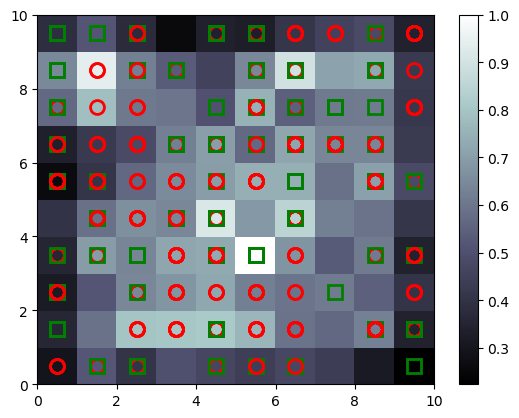

In [49]:
# MID -> mean interneuron distance
# the higher the MID the more the winning node is an outlier
# larger the MID, closer the color to white

from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()
# white -> radius is larger, close to 1

# detect the customers those who has got an approval
# add some markers
markers = ['o', 's']
colors = ['r', 'g']
# loop over all customers, get winning node
# red circle if not approved
# green square if the customer is indeed approved

# i -> index
# x -> row vectors
# we color only the edge not inside of the circle/square that is why -> markeredgecolor
# if approved y=1
# if not approved y=0
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[i]],
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None',
         markersize = 10,
        markeredgewidth = 2)
show()
# we observe both cases in some squares
# we'll seperate and catch them

In [50]:
mappings = som.win_map(X)
mappings
# save as dictionary, indexes are like (0,0) (5,6). These indexes show the start point of the square
# (0,0) takes the first square that goes from x -> 0,1 and y -> 0,1. It's a 1x1 square
# These squares contain customers
# We observe 100 square, each one of them contain different number of customers with their attributes

defaultdict(list,
            {(6,
              6): [array([0.8426814667, 1.          , 0.1252631579, 0.4092857143,
                     0.5         , 0.2307692308, 0.375       , 0.0556140351,
                     0.          , 0.          , 0.          , 1.          ,
                     0.5         , 0.05        , 0.01212     ]), array([0.8112033444, 1.          , 0.1778947368, 0.0119642857,
                     0.5         , 0.2307692308, 0.875       , 0.1228070175,
                     0.          , 0.          , 0.          , 1.          ,
                     0.5         , 0.17        , 0.          ]), array([0.5747750562, 1.          , 0.1403007519, 0.0892857143,
                     0.5         , 0.          , 0.          , 0.0029824561,
                     0.          , 0.          , 0.          , 1.          ,
                     0.5         , 0.05        , 0.04208     ]), array([5.4527507818e-01, 1.0000000000e+00, 5.2631578947e-02,
                     1.0714285714e-01, 

In [58]:
#fraud potentials are -> (1,6) , (4,1) these ones are totally white
# we're adding one list on top of another there fore axis = 0, adding vertically not horizontally
# values are still scaled, we inverse it and take out the IDs

frauds = np.concatenate((mappings[(1,6)], mappings[(4,1)], mappings[(4,4)], mappings[(6,8)]), axis = 0)
frauds = sc.inverse_transform(frauds)
df = pd.DataFrame(frauds, columns=['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15'])
df

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,15723989.00,1.00,22.25,9.00,2.00,6.00,4.00,0.09,0.00,0.00,0.00,0.00,2.00,0.00,1.00
1,15706637.00,1.00,20.00,7.00,2.00,8.00,4.00,0.50,0.00,0.00,0.00,0.00,2.00,0.00,1.00
2,15726167.00,1.00,36.17,18.12,2.00,9.00,4.00,0.09,0.00,0.00,0.00,0.00,2.00,320.00,3553.00
3,15632275.00,1.00,22.75,11.50,2.00,3.00,4.00,0.41,0.00,0.00,0.00,0.00,2.00,0.00,1.00
4,15785339.00,1.00,35.25,3.17,2.00,14.00,8.00,3.75,1.00,0.00,0.00,1.00,2.00,680.00,1.00
5,15678210.00,1.00,42.17,5.04,2.00,11.00,8.00,12.75,1.00,0.00,0.00,1.00,2.00,92.00,1.00
6,15664615.00,1.00,33.17,1.04,2.00,12.00,8.00,6.50,1.00,0.00,0.00,1.00,2.00,164.00,31286.00
7,15607986.00,1.00,40.92,2.25,1.00,14.00,8.00,10.00,1.00,0.00,0.00,1.00,2.00,176.00,1.00
8,15680895.00,1.00,32.33,7.50,2.00,10.00,5.00,1.58,1.00,0.00,0.00,1.00,1.00,420.00,1.00
9,15716276.00,1.00,34.25,3.00,2.00,13.00,8.00,7.42,1.00,0.00,0.00,1.00,2.00,0.00,1.00


In [59]:
fraud_customers = df['1']
fraud_customers

0    15723989.00
1    15706637.00
2    15726167.00
3    15632275.00
4    15785339.00
5    15678210.00
6    15664615.00
7    15607986.00
8    15680895.00
9    15716276.00
10   15803682.00
11   15732943.00
12   15762392.00
13   15812470.00
14   15699294.00
15   15690372.00
16   15780088.00
17   15750476.00
18   15586174.00
19   15789014.00
20   15775750.00
21   15788776.00
22   15775235.00
23   15767231.00
24   15762716.00
25   15768474.00
26   15762045.00
27   15799859.00
28   15771409.00
Name: 1, dtype: float64